<a href="https://colab.research.google.com/github/WildAlex37/g_search_lite/blob/main/G_search_lite_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os
import ipywidgets as widgets
from IPython.display import display

pd.options.display.max_columns = None

In [35]:
df = pd.read_parquet('df_igdb.parquet')

# Data Exploration


In [36]:
'''
# import pour ydata_profiling
import ydata_profiling
from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_file

# creation d'un rapport exploratoire de notre dataframe

profile = ProfileReport(df_total2, title="Analyse Générale",html={'style': {'full_width': True}})

# Affichage de notre rapport exploratoire :

profile.to_notebook_iframe()
'''

'\n# import pour ydata_profiling\nimport ydata_profiling\nfrom ydata_profiling import ProfileReport\nfrom ydata_profiling.utils.cache import cache_file\n\n# creation d\'un rapport exploratoire de notre dataframe\n\nprofile = ProfileReport(df_total2, title="Analyse Générale",html={\'style\': {\'full_width\': True}})\n\n# Affichage de notre rapport exploratoire :\n\nprofile.to_notebook_iframe()\n'

In [37]:
#px.line(df_total2, x="released", y=df_total2.select_dtypes(include='number').columns, title="Titre")

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349229 entries, 0 to 349228
Data columns (total 88 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     349229 non-null  int64         
 1   name                   349229 non-null  object        
 2   metacritic             4655 non-null    float64       
 3   released               349229 non-null  datetime64[ns]
 4   website                56512 non-null   object        
 5   rating                 349229 non-null  float64       
 6   playtime               349229 non-null  float64       
 7   ratings_count          349229 non-null  float64       
 8   suggestions_count      349229 non-null  float64       
 9   game_series_count      349229 non-null  float64       
 10  reviews_count          349229 non-null  float64       
 11  platforms              349229 non-null  object        
 12  developers             346928 non-null  obje

In [39]:
df['genres'].head(10)

0                       Action
1       Action||Adventure||RPG
2              Shooter||Puzzle
3            Action||Adventure
4                  Action||RPG
5              Action||Shooter
6              Action||Shooter
7    Action||Adventure||Puzzle
8              Action||Shooter
9         Action||Shooter||RPG
Name: genres, dtype: object

In [40]:
df.shape

(349229, 88)

In [41]:
df.columns

Index(['id', 'name', 'metacritic', 'released', 'website', 'rating', 'playtime',
       'ratings_count', 'suggestions_count', 'game_series_count',
       'reviews_count', 'platforms', 'developers', 'genres', 'esrb_rating',
       'year', 'decennie', 'Family', 'Sports', 'Action', 'Shooter',
       'Massively Multiplayer', 'Simulation', 'Fighting', 'Adventure', 'RPG',
       'Indie', 'Puzzle', 'Educational', 'Racing', 'Strategy', 'Board Games',
       'Card', 'Arcade', 'Platformer', 'Casual', '', 'Apple II',
       'Game Boy Advance', 'Commodore / Amiga', 'SNES', 'PlayStation 4', 'Web',
       'Jaguar', 'PlayStation 2', 'PC', 'PlayStation 5', 'SEGA Master System',
       'Nintendo DSi', 'Nintendo DS', 'GameCube', 'NES', 'Classic Macintosh',
       '3DO', 'Neo Geo', 'Atari 8-bit', 'Atari Lynx', 'SEGA CD', 'Xbox 360',
       'Linux', 'Xbox Series S/X', 'Dreamcast', 'Game Gear', 'Nintendo 64',
       'Atari 2600', 'Game Boy', 'Android', 'Atari 5200', 'Atari XEGS',
       'macOS', 'Atari Flas

In [42]:
df.head(10)

id                              name  metacritic   released  \
0   3498                Grand Theft Auto V        97.0 2013-09-17   
1   3328          The Witcher 3: Wild Hunt        92.0 2015-05-18   
2   4200                          Portal 2        95.0 2011-04-18   
3   5286                Tomb Raider (2013)        86.0 2013-03-05   
4   5679       The Elder Scrolls V: Skyrim        94.0 2011-11-11   
5   4291  Counter-Strike: Global Offensive        81.0 2012-08-21   
6  12020                     Left 4 Dead 2        89.0 2009-11-17   
7  13536                            Portal        90.0 2007-10-09   
8   4062                 BioShock Infinite        94.0 2013-03-26   
9    802                     Borderlands 2        89.0 2012-09-18   

                              website  rating  playtime  ratings_count  \
0     http://www.rockstargames.com/V/    4.48      69.0         4289.0   
1  https://thewitcher.com/en/witcher3    4.67      50.0         3939.0   
2    http://www.thinkwithportals.com/    4.61      11.0         3613.0   
3           http://www.tombraider.com    4.06      11.0         2527.0   
4            http://elderscrolls.com/    4.42      44.0         3033.0   
5     http://blog.counter-strike.net/    3.57      59.0         2089.0   
6                  http://www.l4d.com    4.10       9.0         2107.0   
7  http://www.whatistheorangebox.com/    4.52       4.0         3050.0   
8    http://www.bioshockinfinite.com/    4.39      12.0         2769.0   
9        http://www.borderlands2.com/    4.05      10.0         2235.0   

   suggestions_count  game_series_count  reviews_count  \
0              426.0                9.0         4334.0   
1              688.0                6.0         3996.0   
2              589.0                2.0         3645.0   
3              673.0               17.0         2542.0   
4              625.0                8.0         3053.0   
5              608.0                5.0         2104.0   
6              610.0                2.0         2116.0   
7              329.0                2.0         3069.0   
8              599.0                4.0         2790.0   
9              660.0                4.0         2246.0   

                                           platforms  \
0  PC||Xbox Series S/X||PlayStation 5||PlayStatio...   
1       PC||Xbox One||Nintendo Switch||PlayStation 4   
2  Xbox One||PlayStation 3||PC||Xbox 360||Linux||...   
3  PC||PlayStation 4||PlayStation 3||Xbox 360||Xb...   
4       PC||PlayStation 3||Xbox 360||Nintendo Switch   
5                        PC||Xbox 360||PlayStation 3   
6                                       PC||Xbox 360   
7  macOS||Android||PC||Linux||PlayStation 3||Xbox...   
8  PC||Nintendo Switch||Linux||PlayStation 3||Pla...   
9  PC||PlayStation 3||Xbox 360||PlayStation 4||ma...   

                                          developers  \
0                                     Rockstar North   
1                                     CD PROJEKT RED   
2                                     Valve Software   
3                                   Crystal Dynamics   
4          Bethesda Softworks||Bethesda Game Studios   
5          Valve Software||Hidden Path Entertainment   
6                Valve Software||Turtle Rock Studios   
7          Valve Software||NVIDIA Lightspeed Studios   
8        Aspyr Media||2K Australia||Irrational Games   
9  Aspyr Media||2K||Gearbox Software||Sony Comput...   

                      genres   esrb_rating    year  decennie  Family  Sports  \
0                     Action        Mature  2013.0    2010.0       0       0   
1     Action||Adventure||RPG        Mature  2015.0    2010.0       0       0   
2            Shooter||Puzzle  Everyone 10+  2011.0    2010.0       0       0   
3          Action||Adventure        Mature  2013.0    2010.0       0       0   
4                Action||RPG        Mature  2011.0    2010.0       0       0   
5            Action||Shooter        Mature  2012.0    2010.0       0       0  

In [43]:
px.histogram(df, x='year', y='playtime', title='Moyenne temps de jeu par an', histfunc='avg')

In [45]:
df_limited = df.head(15).sort_values(by='rating', ascending=False).head(15)

px.bar(df_limited,x='name',y='rating',color='name',text='rating',title ='Top 15 des jeux par note')

In [81]:
# Créer un sélecteur à choix multiples
genre_selector = widgets.SelectMultiple(
    options=[
        'Action', 'Adventure', 'RPG', 'Puzzle', 'Shooter', 'Platformer',
        'Indie', 'Massively Multiplayer', 'Sports', 'Racing', 'Casual',
        'Strategy', 'Simulation', 'Family', 'Educational', 'Arcade', 'Fighting',
        'Board Games', 'Card'
    ],
    value=[
        'Action', 'Adventure', 'RPG', 'Puzzle', 'Shooter', 'Platformer',
        'Indie', 'Massively Multiplayer', 'Sports', 'Racing', 'Casual',
        'Strategy', 'Simulation', 'Family', 'Educational', 'Arcade', 'Fighting',
        'Board Games', 'Card'
    ],
    description='Genres',
    disabled=False
)

# Fonction pour mettre à jour le graphique
def update_graph(selected_genres):
    if not selected_genres:
        # Si aucun genre n'est sélectionné, afficher un message ou un graphique vide
        fig = px.bar(title="Veuillez sélectionner au moins un genre.")
    else:
        # Vérifier que les genres sélectionnés sont présents dans les colonnes du DataFrame
        valid_genres = [genre for genre in selected_genres if genre in df.columns]

        if not valid_genres:
            # Si aucun genre valide n'est sélectionné, afficher un message ou un graphique vide
            fig = px.bar(title="Aucun genre valide sélectionné.")
        else:
            # Calculer le nombre total de jeux pour chaque genre sélectionné
            genre_counts = df.groupby("year")[valid_genres].sum()

            # Transformer les données pour le graphique
            genre_counts = genre_counts.reset_index().melt(id_vars="year", var_name="Genres", value_name="Count")

            # Créer le bar plot
            fig = px.bar(
                genre_counts,
                x="year",
                y="Count",
                color="Genres",
                barmode="group",
                labels={
                    'platforms': 'Platforms',
                    'Count': 'Number of Games',
                    'Genres': 'Genres'
                },
                title="Nombre de Jeux par Genre et année"
            )

    fig.show()

# Affichage du sélecteur et mise à jour du graphique
interactive_plot = widgets.interactive(update_graph, selected_genres=genre_selector)
display(interactive_plot)

interactive(children=(SelectMultiple(description='Genres', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13…

In [54]:
df.columns

Index(['id', 'name', 'metacritic', 'released', 'website', 'rating', 'playtime',
       'ratings_count', 'suggestions_count', 'game_series_count',
       'reviews_count', 'platforms', 'developers', 'genres', 'esrb_rating',
       'year', 'decennie', 'Family', 'Sports', 'Action', 'Shooter',
       'Massively Multiplayer', 'Simulation', 'Fighting', 'Adventure', 'RPG',
       'Indie', 'Puzzle', 'Educational', 'Racing', 'Strategy', 'Board Games',
       'Card', 'Arcade', 'Platformer', 'Casual', '', 'Apple II',
       'Game Boy Advance', 'Commodore / Amiga', 'SNES', 'PlayStation 4', 'Web',
       'Jaguar', 'PlayStation 2', 'PC', 'PlayStation 5', 'SEGA Master System',
       'Nintendo DSi', 'Nintendo DS', 'GameCube', 'NES', 'Classic Macintosh',
       '3DO', 'Neo Geo', 'Atari 8-bit', 'Atari Lynx', 'SEGA CD', 'Xbox 360',
       'Linux', 'Xbox Series S/X', 'Dreamcast', 'Game Gear', 'Nintendo 64',
       'Atari 2600', 'Game Boy', 'Android', 'Atari 5200', 'Atari XEGS',
       'macOS', 'Atari Flas

In [83]:
# Créer un sélecteur à choix multiples pour les plateformes
platform_selector = widgets.SelectMultiple(
    options=df.columns.tolist()[-51:],  # Utilisez les dernières colonnes pour les plateformes
    value=df.columns.tolist()[-51:],
    description='Platforms',
    disabled=False
)

# Fonction pour mettre à jour le graphique
def update_graph(selected_platforms):
    if not selected_platforms:
        # Si aucune plateforme n'est sélectionnée, afficher un message ou un graphique vide
        fig = px.bar(title="Veuillez sélectionner au moins une plateforme.")
    else:
        # Vérifier que les plateformes sélectionnées sont présentes dans les colonnes du DataFrame
        valid_platforms = [platform for platform in selected_platforms if platform in df.columns]

        if not valid_platforms:
            # Si aucune plateforme valide n'est sélectionnée, afficher un message ou un graphique vide
            fig = px.bar(title="Aucune plateforme valide sélectionnée.")
        else:
            # Calculer le nombre total de jeux pour chaque plateforme sélectionnée
            platform_counts = df.groupby("year")[valid_platforms].sum()

            # Transformer les données pour le graphique
            platform_counts = platform_counts.reset_index().melt(id_vars="year", var_name="Platforms", value_name="Count")

            # Créer le bar plot
            fig = px.bar(
                platform_counts,
                x="year",
                y="Count",
                color="Platforms",
                barmode="group",
                labels={
                    'year': 'Year',
                    'Count': 'Number of Games',
                    'Platforms': 'Platforms'
                },
                title="Nombre de Jeux par Plateforme et Année"
            )

    fig.show()

# Affichage du sélecteur et mise à jour du graphique
interactive_plot = widgets.interactive(update_graph, selected_platforms=platform_selector)
display(interactive_plot)


interactive(children=(SelectMultiple(description='Platforms', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,…

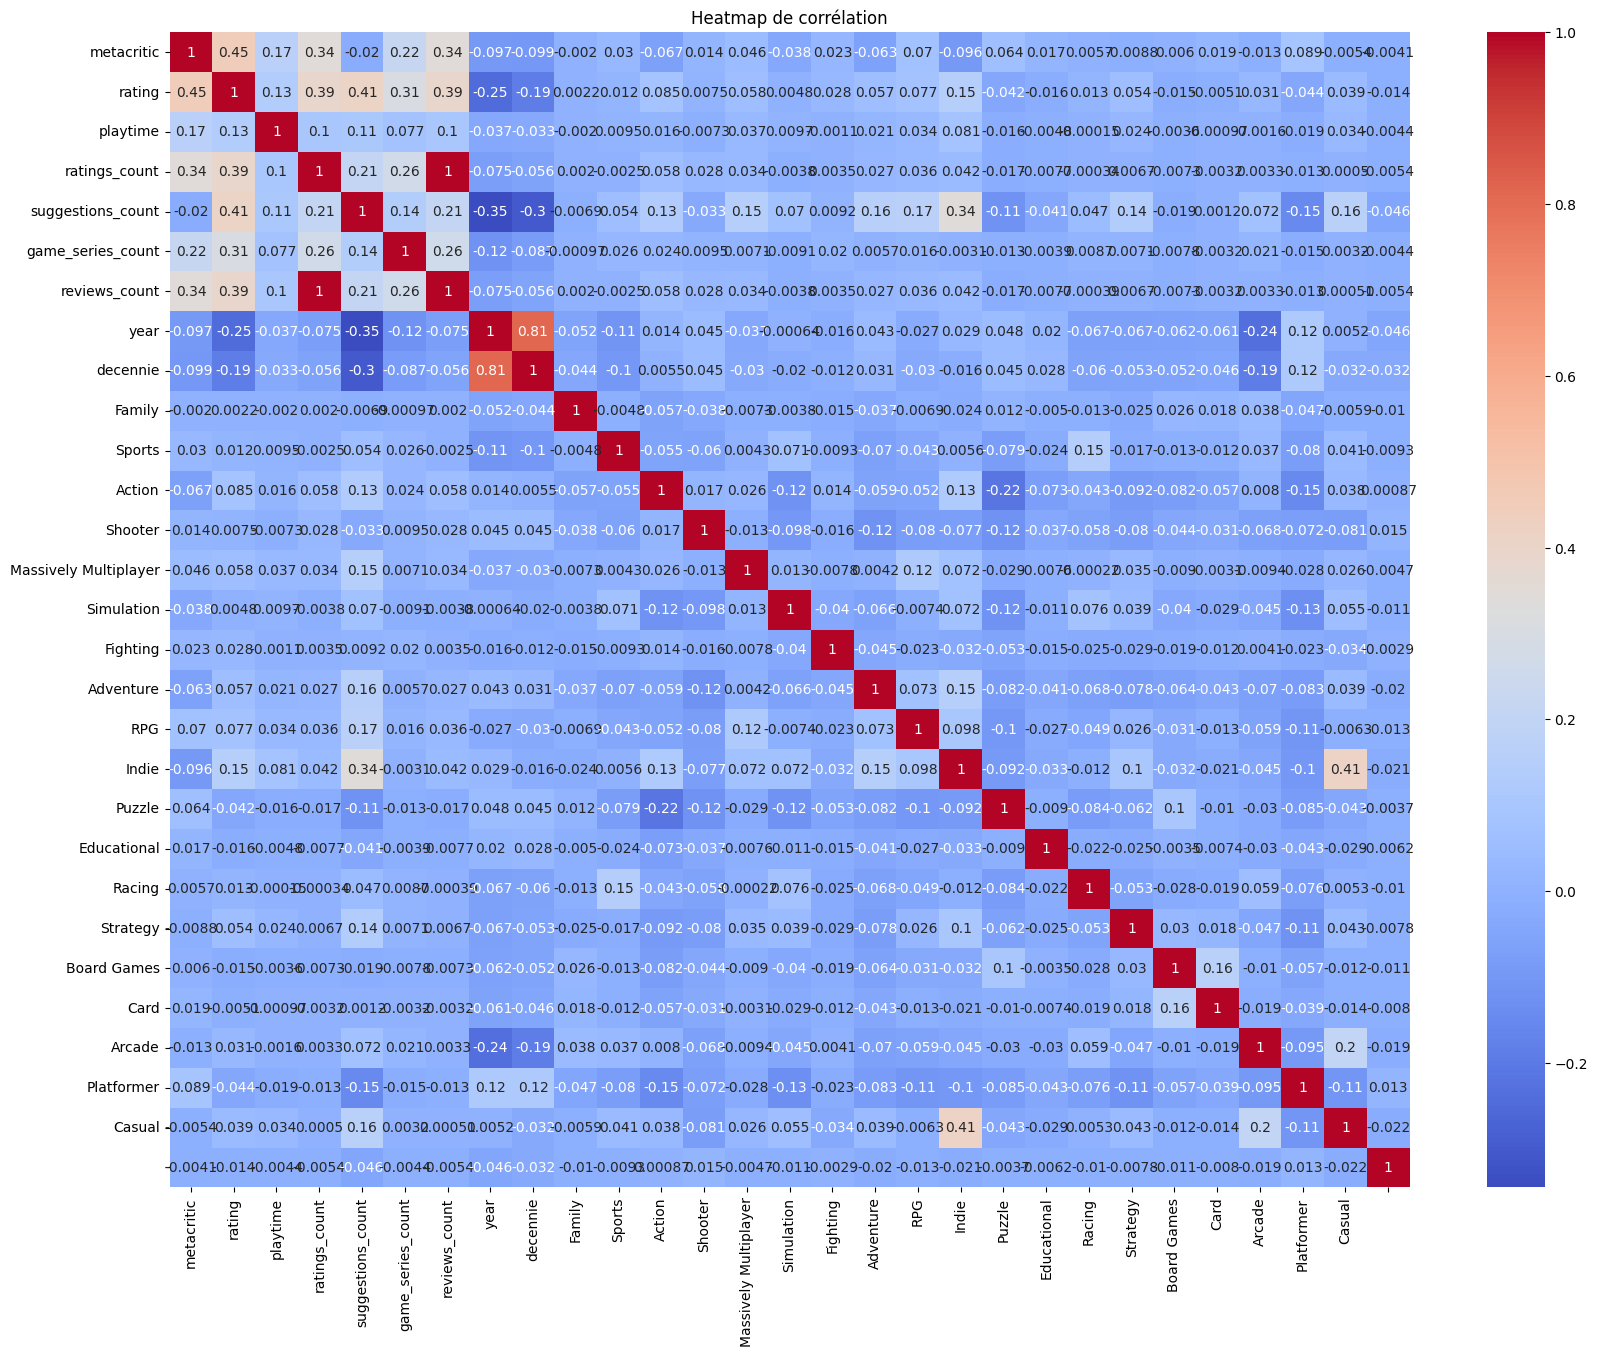

In [89]:
# Select columns with numeric values.
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df = numeric_df.drop(['id','Apple II',
       'Game Boy Advance', 'Commodore / Amiga', 'SNES', 'PlayStation 4', 'Web',
       'Jaguar', 'PlayStation 2', 'PC', 'PlayStation 5', 'SEGA Master System',
       'Nintendo DSi', 'Nintendo DS', 'GameCube', 'NES', 'Classic Macintosh',
       '3DO', 'Neo Geo', 'Atari 8-bit', 'Atari Lynx', 'SEGA CD', 'Xbox 360',
       'Linux', 'Xbox Series S/X', 'Dreamcast', 'Game Gear', 'Nintendo 64',
       'Atari 2600', 'Game Boy', 'Android', 'Atari 5200', 'Atari XEGS',
       'macOS', 'Atari Flashback', 'Wii', 'SEGA Saturn', 'Atari 7800',
       'Nintendo 3DS', 'Genesis', 'PS Vita', 'PlayStation 3', 'PlayStation',
       'Nintendo Switch', 'Atari ST', 'SEGA 32X', 'Wii U', 'Xbox One', 'PSP',
       'iOS', 'Game Boy Color', 'Xbox'],axis=1)

plt.figure(figsize=(20, 15))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap de corrélation')
plt.show()